### EDA apllied to humidity and temperature values

This Notebook take the humidity and temperature obtained from a DHT 22 sensor and apply EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

### Read the voltage

In [2]:
#Read the .csv file
df = pd.read_csv("Variables_sensor.csv")

#Change the columns name
df.columns = ['time_stamp', 'id', 'humidity', 'temperature']
df.head(10)

,time_stamp,id,humidity,temperature
0,2020-07-24 16:42:34 -0400,1062238,55.0,22.2
1,2020-07-24 16:42:51 -0400,1062239,54.7,22.1
2,2020-07-24 16:43:07 -0400,1062240,54.8,22.2
3,2020-07-24 16:43:23 -0400,1062241,54.7,22.1
4,2020-07-24 16:43:40 -0400,1062242,54.6,22.1
5,2020-07-24 16:43:56 -0400,1062243,54.9,22.2
6,2020-07-24 16:44:12 -0400,1062244,55.0,22.2
7,2020-07-24 16:44:29 -0400,1062245,55.2,22.2
8,2020-07-24 16:44:45 -0400,1062246,55.5,22.2
9,2020-07-24 16:45:01 -0400,1062247,55.4,22.2


In [3]:
df.shape

(100, 4)

In [4]:
#Filtering the columns
time = df["time_stamp"]  
humidity = df["humidity"]
temperature = df["temperature"]

#From time and voltage, take the first 25 values
upper_limit = 25
time = time.iloc[0:upper_limit]
humidity = humidity.iloc[0:upper_limit]
temperature = temperature.iloc[0:upper_limit]

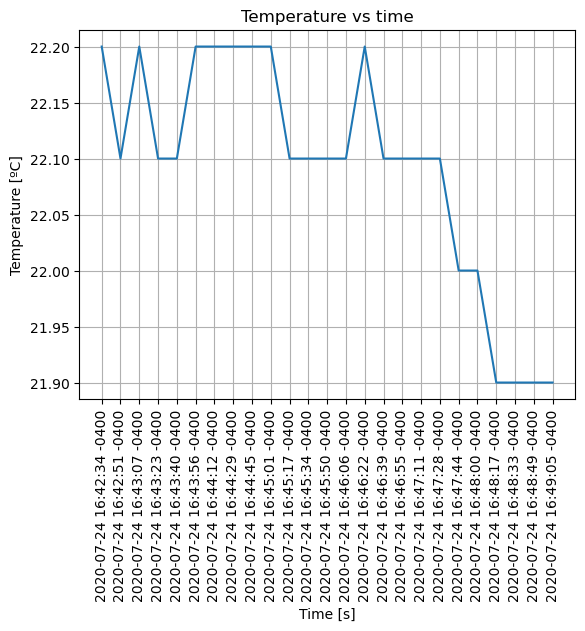

In [5]:
plt.plot(time, temperature)
 
# rotating the x-axis tick labels at 90 degree
plt.xticks(rotation=90)
 
# Labels
plt.title('Temperature vs time')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [ºC]')

plt.grid()

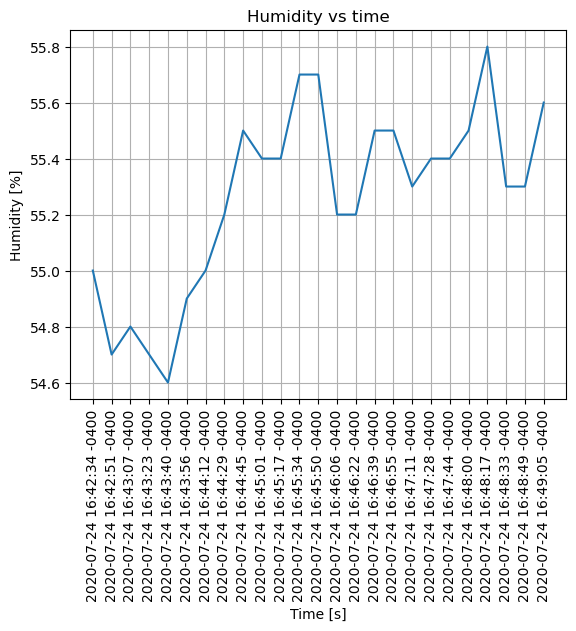

In [6]:
plt.plot(time, humidity)
 
# rotating the x-axis tick labels at 90 degree
plt.xticks(rotation=90)
 
# Labels
plt.title('Humidity vs time')
plt.xlabel('Time [s]')
plt.ylabel('Humidity [%]')

plt.grid()

### Statistics

In [7]:
df[["humidity", "temperature"]].describe()

,humidity,temperature
count,100.000000,100.000000
mean,54.540000,22.182000
std,1.042433,0.376958
min,52.000000,21.600000
25%,53.600000,21.900000
50%,54.850000,22.100000
75%,55.400000,22.500000
max,55.900000,22.900000


### Boxplots

<AxesSubplot:>

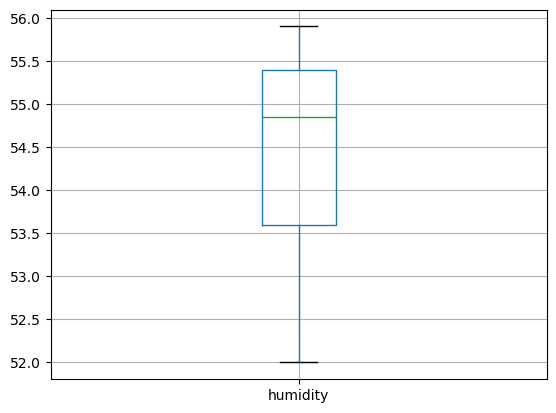

In [8]:
df.boxplot(column=["humidity"])

<AxesSubplot:>

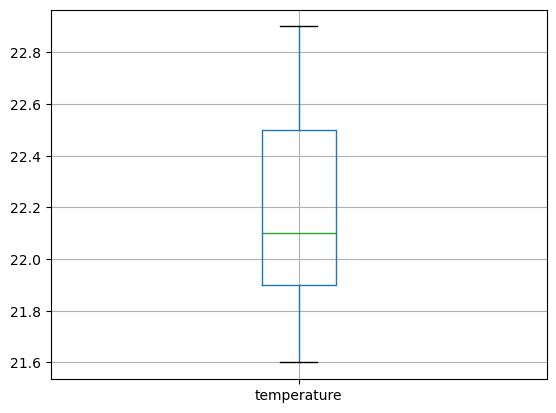

In [9]:
df.boxplot(column=["temperature"])

### Correlation Analysis

In [10]:
#First, we delete the time stamp and id variables for obtain the correlation between temperature and humidity
df = df.drop(['time_stamp', 'id'], axis=1)

In [11]:
#Compute the Pearson correlation
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,humidity,temperature
humidity,1.000000,-0.809411
temperature,-0.809411,1.000000


<AxesSubplot:>

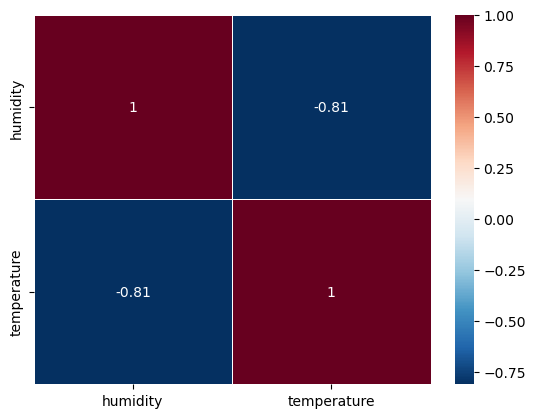

In [12]:
#Add a map color to the correlation for improve the analysis
sb.heatmap(pearsoncorr, 
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.5)

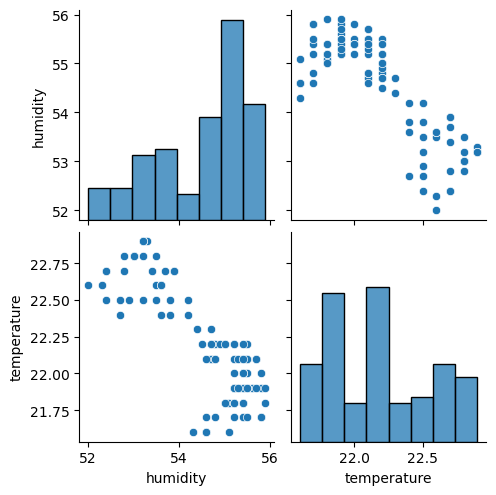

In [13]:
#Add one variable vs other
sb.pairplot(df)

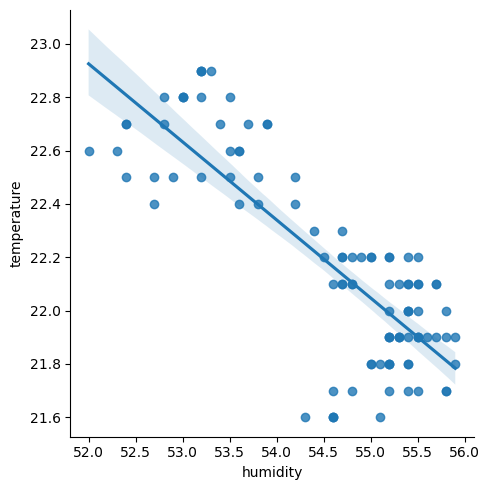

In [14]:
sb.lmplot(x='humidity', y ='temperature', data= df)